# Data Exploration

Perform Data Exploration on the Consolidated Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline

In [2]:
path_df = "./Pickles/all_articles_raw.pickle"

with open(path_df, 'rb') as data:
    articles = pickle.load(data)

## News Source

In [3]:
articles.head()

,source,title,article,category
0,Channel News Asia,NaN,CAIRO: Egypt's communications ministry will be...,Business
1,The Straits Times,"China suspends mainland movies, stars from Tai...",\nSHANGHAI/TAIPEI (REUTERS) - China's film reg...,World
2,The Straits Times,Singapore shares open lower on Monday as oil s...,\nSINGAPORE - Singapore shares started the wee...,Business
3,The Straits Times,Ahn Jae-hyun apologises to actress after affai...,\nAhn Jae-hyun has not resorted to tit-for-tat...,Lifestyle
4,The Straits Times,Andy Hui scandal: TVB to lose nearly $2m to re...,\nSINGAPORE - The guilty parties have said sor...,Lifestyle


In [4]:
len(articles)

10919

Text(0.5, 1.0, 'News Source')

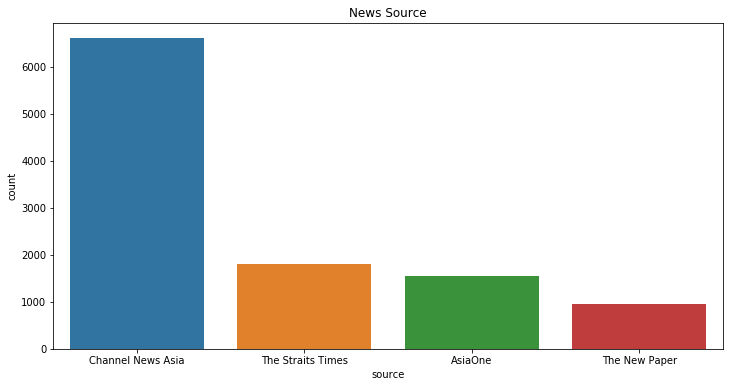

In [5]:
plt.figure(figsize=(12,6))
sns.countplot(x='source',data=articles,order=articles['source'].value_counts().iloc[:10].index,).set_title("News Source")

In [6]:
articles['source'].value_counts()

Channel News Asia    6612
The Straits Times    1810
AsiaOne              1541
The New Paper         956
Name: source, dtype: int64

## Article Categories

Text(0.5, 1.0, 'Categories')

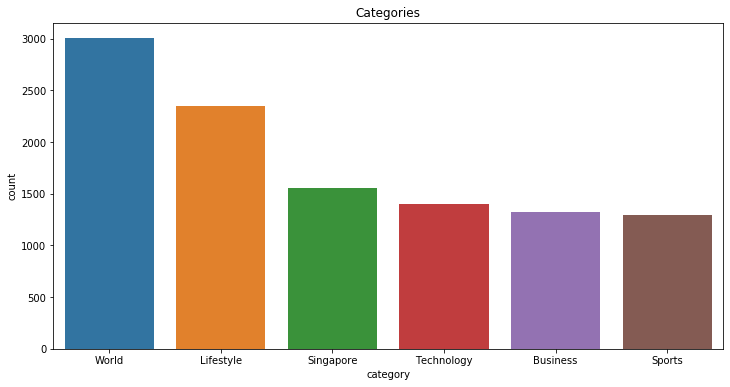

In [7]:
plt.figure(figsize=(12,6))
sns.countplot(x='category',data=articles,order=articles['category'].value_counts().iloc[:10].index,).set_title("Categories")

In [8]:
articles['category'].value_counts()

World         3005
Lifestyle     2347
Singapore     1552
Technology    1400
Business      1323
Sports        1292
Name: category, dtype: int64

In [9]:
all_categories= articles['category'].unique()
all_categories

array(['Business', 'World', 'Lifestyle', 'Singapore', 'Sports',
       'Technology'], dtype=object)

In [10]:
sampled_data =[]
for category in all_categories:
    df = articles[articles['category']==category].sample(n=1200)
    sampled_data.append(df)

In [11]:
all_articles = pd.concat(sampled_data)
all_articles.head()

,source,title,article,category
8192,AsiaOne,Honestbee applies for court protection from cr...,SINGAPORE - Troubled retail start-up Honestbee...,Business
6604,Channel News Asia,NaN,"LONDON: Boris Johnson, the UK prime minister, ...",Business
1459,Channel News Asia,NaN,PARIS: Japan and South Korea are showing no si...,Business
257,Channel News Asia,NaN,NEW YORK: Wall Street stocks tumbled on Tuesda...,Business
8586,Channel News Asia,NaN,WASHINGTON: General Motors Co said Wednesday i...,Business


In [12]:
#all_articles=articles

In [13]:
all_articles['category'].value_counts()

Sports        1200
Technology    1200
Business      1200
Lifestyle     1200
Singapore     1200
World         1200
Name: category, dtype: int64

## Article Length

In [14]:
all_articles['length_characters'] = all_articles['article'].apply(len)
all_articles['length_words']=all_articles['article'].str.split().str.len()
all_articles.head()

,source,title,article,category,length_characters,length_words
8192,AsiaOne,Honestbee applies for court protection from cr...,SINGAPORE - Troubled retail start-up Honestbee...,Business,4279,672
6604,Channel News Asia,NaN,"LONDON: Boris Johnson, the UK prime minister, ...",Business,4956,889
1459,Channel News Asia,NaN,PARIS: Japan and South Korea are showing no si...,Business,6081,981
257,Channel News Asia,NaN,NEW YORK: Wall Street stocks tumbled on Tuesda...,Business,1767,298
8586,Channel News Asia,NaN,WASHINGTON: General Motors Co said Wednesday i...,Business,2619,410


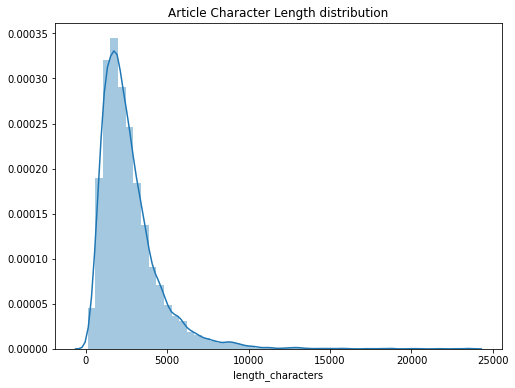

In [15]:
plt.figure(figsize=(8,6))
sns.distplot(all_articles['length_characters']).set_title('Article Character Length distribution');

In [16]:
all_articles['length_characters'].describe()

count     7200.000000
mean      2690.051250
std       1889.042881
min        111.000000
25%       1484.000000
50%       2252.000000
75%       3336.000000
max      23548.000000
Name: length_characters, dtype: float64

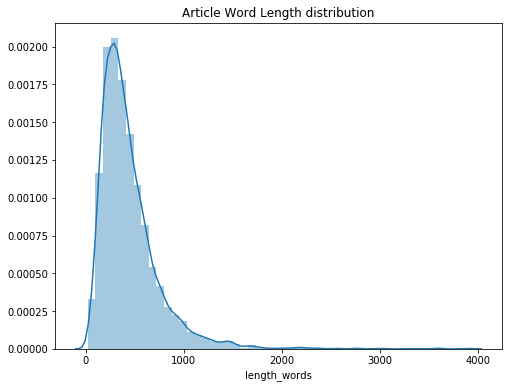

In [17]:
plt.figure(figsize=(8,6))
sns.distplot(all_articles['length_words']).set_title('Article Word Length distribution');

In [18]:
all_articles['length_words'].describe()

count    7200.000000
mean      443.219444
std       313.545445
min        21.000000
25%       243.000000
50%       368.500000
75%       552.000000
max      3908.000000
Name: length_words, dtype: float64

### Longest Article

In [19]:
longest = all_articles[all_articles['length_words']==all_articles['length_words'].max()]['article'].iloc[0]
longest

"SINGAPORE: In a country where most people do not think twice about buying new clothes, Mr Leow Yee Shiang has not bought a single piece of clothing in the past two years., The 31-year-old civil servant practises what he calls a “minimalist lifestyle”. He rarely shops, and has only bought four items for himself this year – a water bottle, socks, lenses for his sunglasses and a motorcycle plate number., What sparked the decision? Mr Leow said it happened early last year when he was packing his belongings for his return to Singapore from Australia, where he had been living with his wife for two years because of work. , Among some of the items which he threw out included his wedding photo and its frame, as well as the love letters he got from his wife when they were dating. It means that he can now “focus on cherishing” their relationship, he said with a smile., Another person who has gone to the extremes to reduce his carbon footprint is Mr Tan Hang Chong., Mr Tan is the co-founder of Fo

### Shortest Article

In [20]:
shortest = all_articles[all_articles['length_words']==all_articles['length_words'].min()]['article'].iloc[0]
shortest

'KUALA LUMPUR: The first image of a black hole was unveiled on Wednesday (Apr 10) by astronomers, hailed as an "'

### Article Length by Category

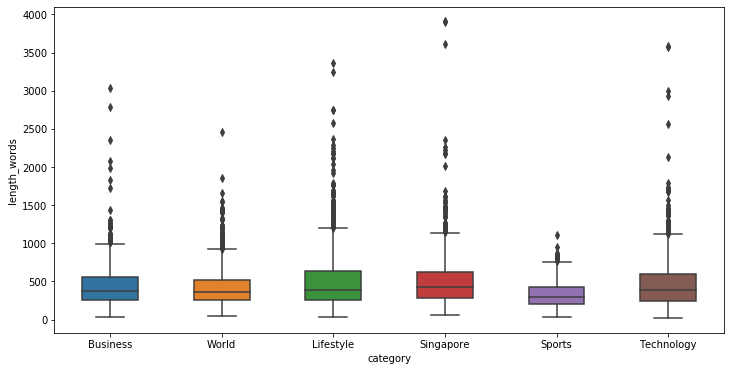

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(data=all_articles, x='category', y='length_words', width=.5);

In [22]:
all_articles.groupby('category')['length_words'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Business,1200.0,431.266667,277.480230,35.0,251.00,380.5,552.00,3040.0
Lifestyle,1200.0,521.651667,404.268522,39.0,260.00,385.5,634.00,3361.0
Singapore,1200.0,500.735833,351.121645,61.0,278.75,420.5,622.00,3908.0
Sports,1200.0,327.443333,163.310723,40.0,199.00,300.0,423.50,1107.0
Technology,1200.0,460.778333,340.592660,21.0,243.75,390.5,596.25,3586.0
World,1200.0,417.440833,244.716963,41.0,256.00,364.0,525.00,2462.0


In [ ]:
#Export to Serialized Object
with open('Pickles/sampled_articles_raw.pickle', 'wb') as output:
    pickle.dump(all_articles, output)